In [27]:
import numpy as np
import pandas as pd 

In [28]:
df = pd.read_csv(r"C:\Users\NCC\Documents\joshua\ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [29]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [30]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [31]:
df = df.drop(columns=["Unnamed: 0"],axis=1)

In [32]:
features = df[["work_year","remote_ratio"]]
target = df["salary_in_usd"]

In [33]:
features

,work_year,remote_ratio
0,2020,0
1,2020,0
2,2020,50
3,2020,0
4,2020,50
...,...,...
602,2022,100
603,2022,100
604,2022,0
605,2022,100


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier

models = {
  "KNN": KNeighborsClassifier(),
  "Decision Tree": DecisionTreeClassifier(),
  "Random Forest": RandomForestClassifier()
}

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [37]:
model.fit(x_train, y_train)

## predicitons

y_pred = model.predict(x_train)

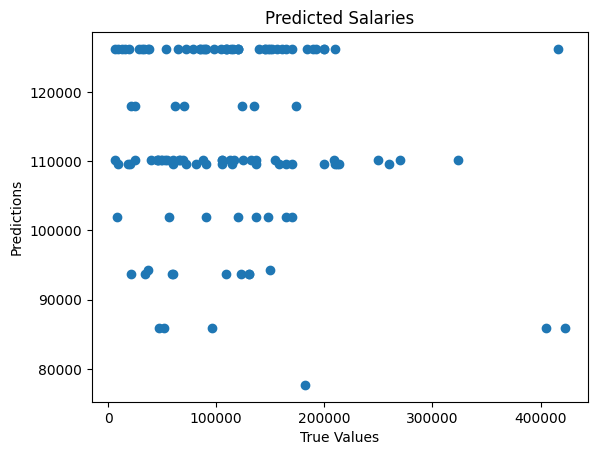

Length of y_test: 122
Length of y_pred: 122


In [57]:
# Check and truncate to the minimum length
min_length = min(len(y_test), len(y_pred))
y_test = y_test[:min_length]
y_pred = y_pred[:min_length]

# Import and plot
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Predicted Salaries")
plt.show()

# Print lengths after truncating (optional)
print("Length of y_test:", len(y_test))
print("Length of y_pred:", len(y_pred))


In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 60651.68410777591
Mean Squared Error: 6713127434.07284
R-squared: -0.05056484778473713


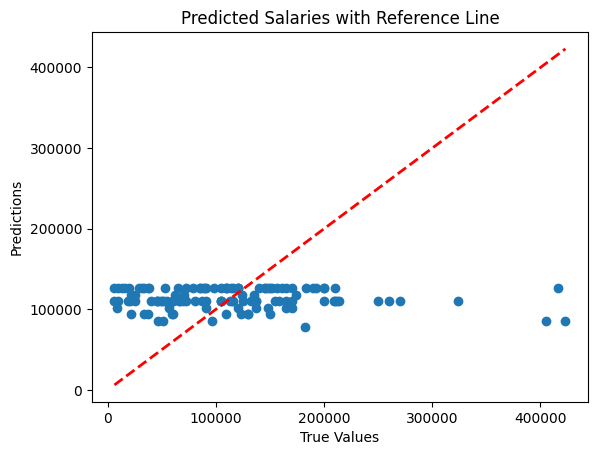

In [59]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)  # Reference line
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Predicted Salaries with Reference Line")
plt.show()


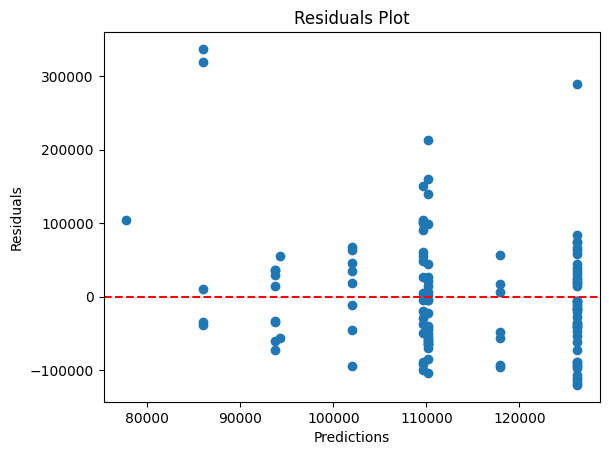

In [60]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.axhline(0, color='red', linestyle='--')
plt.show()
